In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [2]:
!wget "https://simplemaps.com/static/data/country-cities/in/in.csv"

df = pd.read_csv("./in.csv")
df.head(20)
df.drop(['country','iso2','capital','population_proper'],axis=1,inplace=True)


--2020-07-20 05:04:06--  https://simplemaps.com/static/data/country-cities/in/in.csv
Resolving simplemaps.com (simplemaps.com)... 104.26.13.95, 104.26.12.95, 172.67.71.113, ...
Connecting to simplemaps.com (simplemaps.com)|104.26.13.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14254 (14K) [text/csv]
Saving to: ‘in.csv’

in.csv              100%[===================>]  13.92K  --.-KB/s    in 0s      

2020-07-20 05:04:07 (43.0 MB/s) - ‘in.csv’ saved [14254/14254]



In [50]:
df.dtypes
df.shape
df.rename(columns={'admin':'state'}, inplace = True)

In [119]:
df_20  = df.head(20)


,city,lat,lng,state,population
0,Mumbai,18.987807,72.836447,Mahārāshtra,18978000.0
1,Delhi,28.651952,77.231495,Delhi,15926000.0
2,Kolkata,22.562627,88.363044,West Bengal,14787000.0
3,Chennai,13.084622,80.248357,Tamil Nādu,7163000.0
4,Bengalūru,12.977063,77.587106,Karnātaka,6787000.0
5,Hyderabad,17.384052,78.456355,Andhra Pradesh,6376000.0
6,Ahmadābād,23.025793,72.587265,Gujarāt,5375000.0
7,Hāora,22.576882,88.318566,West Bengal,4841638.0
8,Pune,18.513271,73.849852,Mahārāshtra,4672000.0
9,Sūrat,21.195944,72.830232,Gujarāt,3842000.0


Text(0.5, 1.0, 'Population Vs City')

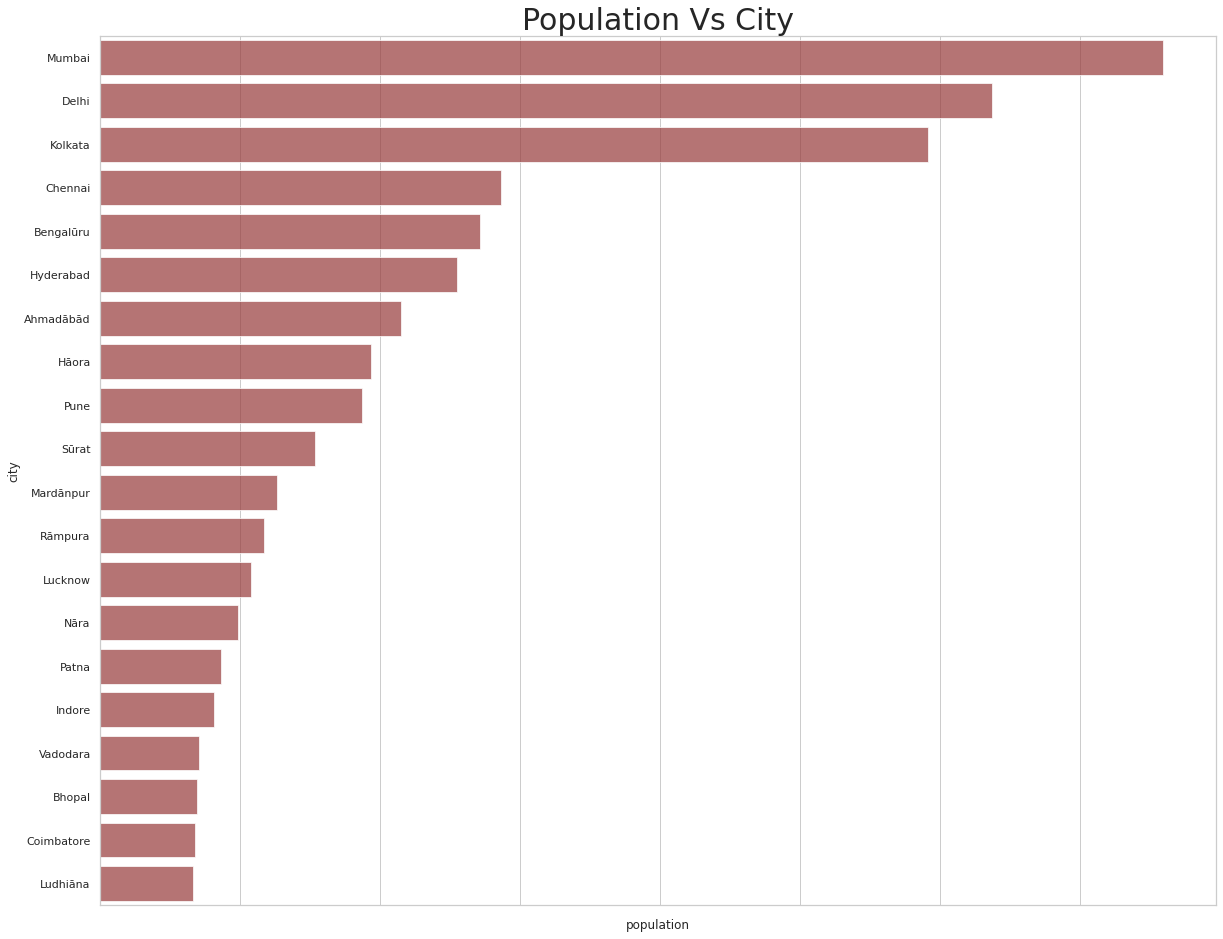

In [125]:
#Exploring the Dataset
import seaborn as sns

plt.figure(figsize=(20,16))
sns.set(font_scale=10)
sns.set(style="whitegrid")
ax = sns.barplot(x="population", y="city", data=df_20,color="brown", alpha=.7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Population Vs City",size=30)

In [4]:
#Importing other libraries for clustering and visualization
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import folium

In [5]:
## Define Foursquare Credentials
CLIENT_ID = 'RQJ0PTKFPB0EG0PCUJBRIYCRYI4KWAGB1FHBV5UE04OALSL2' # your Foursquare ID
CLIENT_SECRET = '4XH1HJKAXAVZQWOAGAVGN31W3WAJN0VOFE25X40OO3Y0YNN0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [12]:
##We will Define a function to Explore the cities of India and get the Venues within 5 km

LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:

#Use the Above Function on our Dataset

city_venues = getNearbyVenues(names=df['city'],
                                   latitudes=df['lat'],
                                   longitudes=df['lng']
                                  )

Mumbai
Delhi
Kolkata
Chennai
Bengalūru
Hyderabad
Ahmadābād
Hāora
Pune
Sūrat
Mardānpur
Rāmpura
Lucknow
Nāra
Patna
Indore
Vadodara
Bhopal
Coimbatore
Ludhiāna
Āgra
Kalyān
Vishākhapatnam
Kochi
Nāsik
Meerut
Farīdābād
Vārānasi
Ghāziābād
Āsansol
Jamshedpur
Madurai
Jabalpur
Rājkot
Dhanbād
Amritsar
Warangal
Allahābād
Srīnagar
Aurangābād
Bhilai
Solāpur
Ranchi
Jodhpur
Guwāhāti
Chandigarh
Gwalior
Thiruvananthapuram
Tiruchchirāppalli
Hubli
Mysore
Raipur
Salem
Bhubaneshwar
Kota
Jhānsi
Bareilly
Alīgarh
Bhiwandi
Jammu
Morādābād
Mangalore
Kolhāpur
Amrāvati
Dehra Dūn
Mālegaon Camp
Nellore
Gopālpur
Shimoga
Tiruppūr
Raurkela
Nānded
Belgaum
Sāngli
Chānda
Ajmer
Cuttack
Bīkaner
Bhāvnagar
Hisar
Bilāspur
Tirunelveli
Guntūr
Shiliguri
Ujjain
Davangere
Akola
Sahāranpur
Gulbarga
Bhātpāra
Dhūlia
Udaipur
Bellary
Tuticorin
Kurnool
Gaya
Sīkar
Tumkūr
Kollam
Ahmadnagar
Bhīlwāra
Nizāmābād
Parbhani
Shillong
Lātūr
Rājapālaiyam
Bhāgalpur
Muzaffarnagar
Muzaffarpur
Mathura
Patiāla
Saugor
Brahmapur
Shāhbāzpur
New Delhi
Rohtak


In [14]:
city_venues.head(15)

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,18.987807,72.836447,The St. Regis Mumbai,18.993652,72.825220,Hotel
1,Mumbai,18.987807,72.836447,Ladu Samrat,18.994526,72.836574,Maharashtrian Restaurant
2,Mumbai,18.987807,72.836447,Jai Hind Lunch Home,19.002183,72.829512,Seafood Restaurant
3,Mumbai,18.987807,72.836447,High Street Phoenix,18.994967,72.825032,Shopping Mall
4,Mumbai,18.987807,72.836447,Smoke House Deli,18.994478,72.824400,Restaurant
5,Mumbai,18.987807,72.836447,Aer Four Seasons Hotel,18.994132,72.820377,Lounge
6,Mumbai,18.987807,72.836447,Canvas Laugh Club,18.994482,72.824413,Comedy Club
7,Mumbai,18.987807,72.836447,Indigo Delicatessen,18.994498,72.823760,Deli / Bodega
8,Mumbai,18.987807,72.836447,The Sahib Room & Kipling Bar,18.994333,72.823850,Indian Restaurant
9,Mumbai,18.987807,72.836447,The Irish House,18.994416,72.824721,Pub


In [15]:
#For the easiness of analysis, we split the grouped data based on Venue Category into 2. Frequesnt and Less Frequent
category_grouped = city_venues.groupby('Venue Category').count().sort_values(by='City',ascending=False).reset_index()
category_grouped_frequent= category_grouped.head(50)
category_grouped_frequent = category_grouped_frequent.iloc[: , 0:2]
category_grouped_frequent 
category_grouped_less_frequent = category_grouped.iloc[50:100 , 0:2].reset_index()
category_grouped_less_frequent

,index,Venue Category,City
0,50,Bed & Breakfast,17
1,51,Plaza,16
2,52,City,16
3,53,Nightclub,16
4,54,Hookah Bar,15
5,55,Food,15
6,56,Arcade,15
7,57,Multicuisine Indian Restaurant,14
8,58,Art Gallery,14
9,59,Indian Sweet Shop,13


Text(0.5, 1.0, 'Frequent Venue Category')

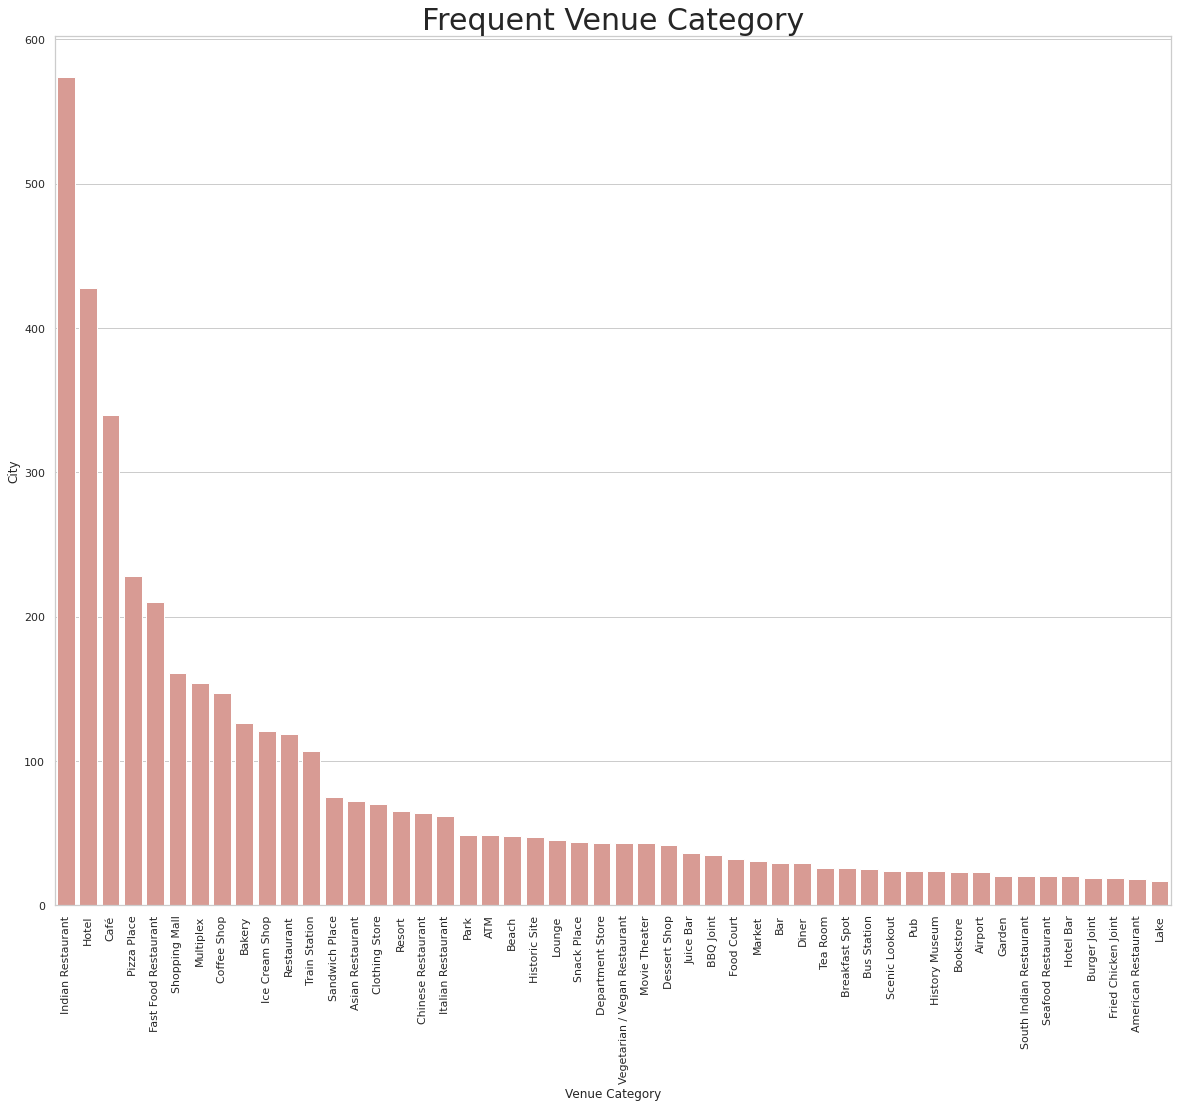

In [127]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.set(font_scale=10)
sns.set(style="whitegrid")
ax = sns.barplot(x="Venue Category", y="City", data=category_grouped_frequent,color="salmon", saturation=.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Frequent Venue Category",size=30)

Text(0.5, 1.0, 'Less Frequent Venue Category')

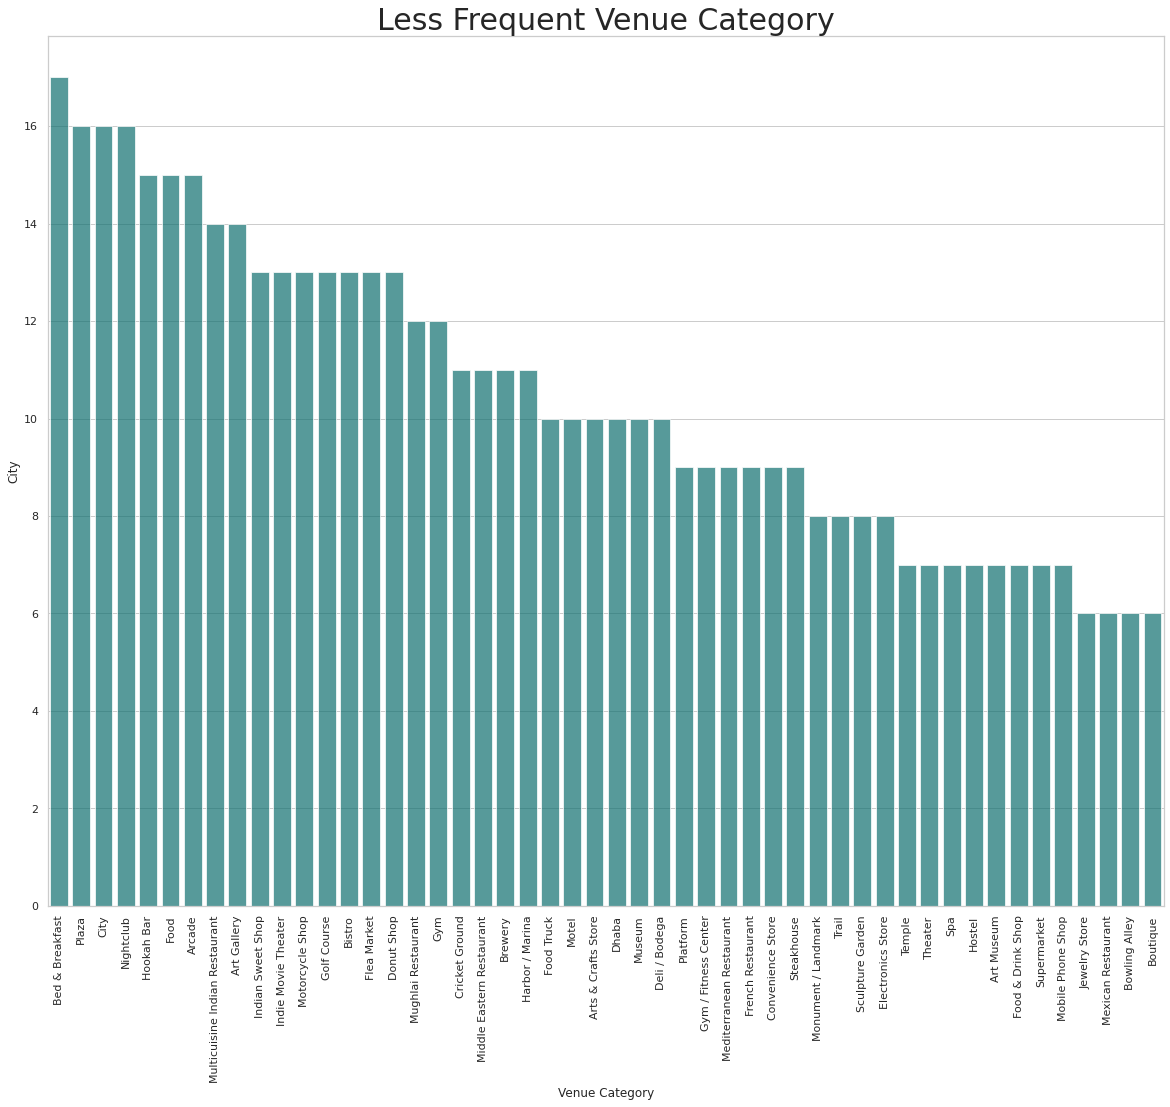

In [126]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.set(font_scale=10)
sns.set(style="whitegrid")
ax = sns.barplot(x="Venue Category", y="City", data=category_grouped_less_frequent,color="teal", alpha=.7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Less Frequent Venue Category",size=30)

In [108]:
#Exploring Food Truck Business Oppertunity
food_truck=city_venues[city_venues['Venue Category']=='Food Truck'].reset_index()
food_truck.rename(columns={'City':'city'}, inplace = True)
food_truck=food_truck.merge(df, on='city',how='inner',sort=True)
food_truck
food_truck_state=food_truck.groupby('state').count().reset_index()
food_truck_state





,index,city,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,lat,lng,state,population
0,117,Delhi,28.651952,77.231495,Jain Chawal Wale,28.630052,77.217649,Food Truck,28.651952,77.231495,Delhi,15926000.0
1,512,Hyderabad,17.384052,78.456355,Ram ki Bandi,17.382398,78.475014,Food Truck,17.384052,78.456355,Andhra Pradesh,6376000.0
2,3089,Kolhāpur,16.695633,74.231669,Rajabhau Special Bhel,16.686655,74.272874,Food Truck,16.695633,74.231669,Mahārāshtra,750000.0
3,3704,New Delhi,28.600000,77.200000,Jain Chawal Wale,28.630052,77.217649,Food Truck,28.600000,77.200000,Delhi,317797.0
4,1229,Nāra,21.203096,79.089284,Traffic Park Street Food,21.118810,79.075040,Food Truck,21.203096,79.089284,Mahārāshtra,2454000.0
5,838,Pune,18.513271,73.849852,JJ Garden Wada Pav,18.516492,73.878835,Food Truck,18.513271,73.849852,Mahārāshtra,4672000.0
6,887,Pune,18.513271,73.849852,Sapna Pav Bhaji,18.483424,73.882321,Food Truck,18.513271,73.849852,Mahārāshtra,4672000.0
7,4651,Silvassa,20.273855,72.996728,Kotak Mahindra Bank - Branch/ATM,20.270928,73.003805,Food Truck,20.273855,72.996728,Dādra and Nagar Haveli,27359.0
8,2596,Thiruvananthapuram,8.485498,76.949238,Irani Fast Food,8.490594,76.929744,Food Truck,8.485498,76.949238,Kerala,954000.0
9,1329,Vadodara,22.299405,73.208119,Raju's Omelette,22.322268,73.196919,Food Truck,22.299405,73.208119,Gujarāt,1756000.0


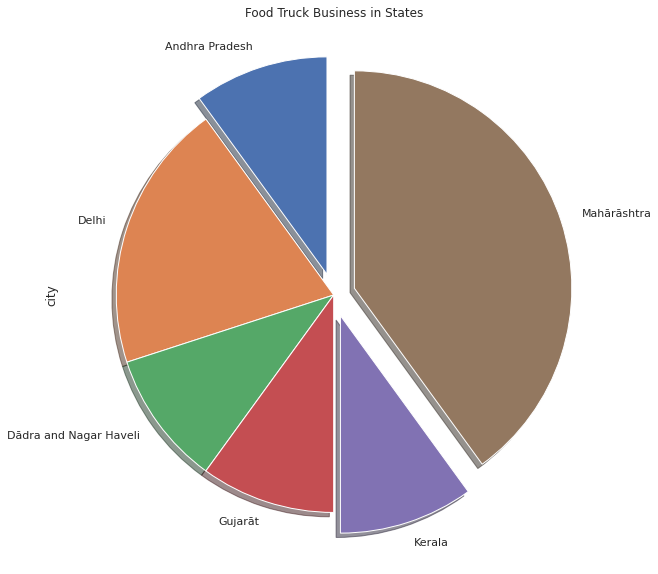

In [106]:
#Piechart for Food Truck
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge
labels = ['Andhra Pradesh', 'Delhi', 'Dādra and Nagar Haveli', 'Gujarāt','Kerala','Mahārāshtra']
food_truck_state['city'].plot(kind='pie',
                            figsize=(20, 10),
                            startangle=90,  
                              title = 'Food Truck Business in States',
                            shadow=True,       
                            labels=labels,
                            pctdistance=1.12, # the ratio bn the centr of each pie and the start of the text by autopct 
                            explode=explode_list # 'explode' lowest 3 continents
                            )

In [98]:
#Exploring Jewelry Store Business Oppertunity

jew_store=city_venues[city_venues['Venue Category']=='Jewelry Store'].reset_index()
jew_store.rename(columns={'City':'city'}, inplace = True)
jew_store=jew_store.merge(df, on='city',how='inner',sort=True)
jew_store


,index,city,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,lat,lng,state,population
0,4776,Calicut,11.248016,75.780402,Malabar Gold,11.252616,75.787167,Jewelry Store,11.248016,75.780402,Kerala,NaN
1,344,Chennai,13.084622,80.248357,Tanishq,13.043507,80.232439,Jewelry Store,13.084622,80.248357,Tamil Nādu,7163000.0
2,3772,Fīrozābād,27.150917,78.397808,Ratan Jewellers,27.123606,78.481540,Jewelry Store,27.150917,78.397808,Uttar Pradesh,306409.0
3,4127,Proddatūr,14.750200,78.548129,Busetty Jewellers,14.745411,78.551148,Jewelry Store,14.750200,78.548129,Andhra Pradesh,197451.0
4,2607,Thiruvananthapuram,8.485498,76.949238,Bhima Jewellery,8.490356,76.947045,Jewelry Store,8.485498,76.949238,Kerala,954000.0
5,4478,Vālpārai,10.325163,76.955299,Deepika Jewellery,10.327992,76.956360,Jewelry Store,10.325163,76.955299,Tamil Nādu,114308.0


Text(0.5, 1.0, 'Jewelry Business Statewise')

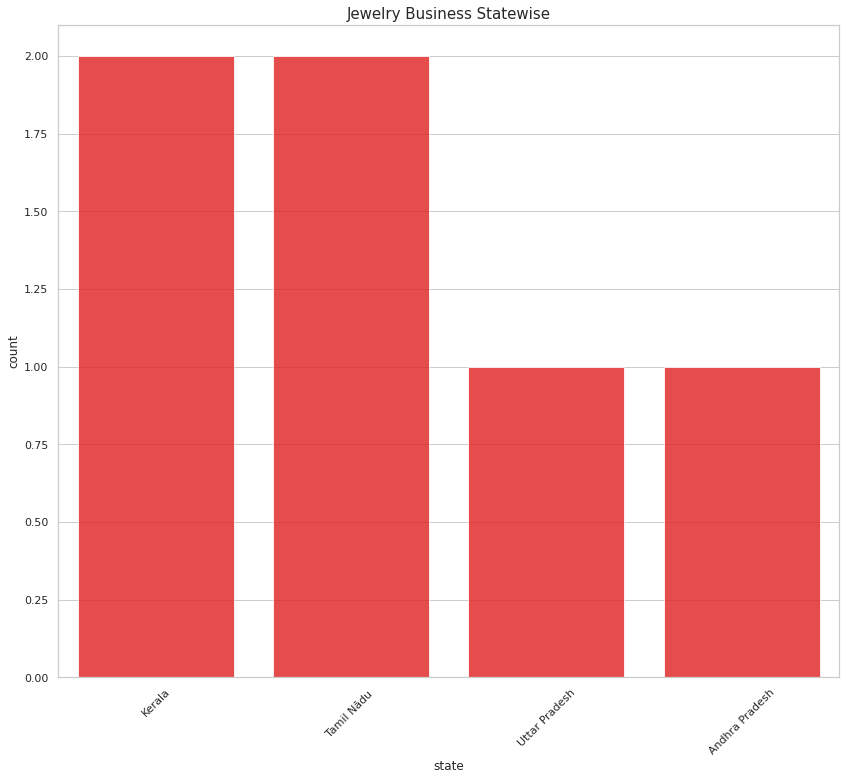

In [103]:
plt.figure(figsize=(14,12))
g = sns.countplot('state', data=jew_store, color='red',alpha=.8)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Jewelry Business Statewise',size=15)

In [107]:
#Exploring Bowling Alley Business Oppertunity

b_a=city_venues[city_venues['Venue Category']=='Bowling Alley'].reset_index()
b_a.rename(columns={'City':'city'}, inplace = True)
b_a= b_a.merge(df, on='city',how='inner',sort=True)
b_a

,index,city,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,lat,lng,state,population
0,477,Bengalūru,12.977063,77.587106,PVR bluO,13.011198,77.555057,Bowling Alley,12.977063,77.587106,Karnātaka,6787000.0
1,4754,Calicut,11.248016,75.780402,Amoeba Focus Mall,11.254941,75.779813,Bowling Alley,11.248016,75.780402,Kerala,NaN
2,4169,Gurgaon,28.460105,77.026352,PVR bluO,28.502957,77.097185,Bowling Alley,28.460105,77.026352,Haryāna,197340.0
3,992,Mardānpur,26.430066,80.267176,The Landmark Hotel,26.474208,80.348125,Bowling Alley,26.430066,80.267176,Uttar Pradesh,3162000.0
4,2746,Mysore,12.292664,76.638543,Big Bowl,12.323702,76.625675,Bowling Alley,12.292664,76.638543,Karnātaka,887000.0
5,2790,Mysore,12.292664,76.638543,Bowling Alley,12.361956,76.596164,Bowling Alley,12.292664,76.638543,Karnātaka,887000.0


Text(0.5, 1.0, 'Bowling Alley Frequency City wise')

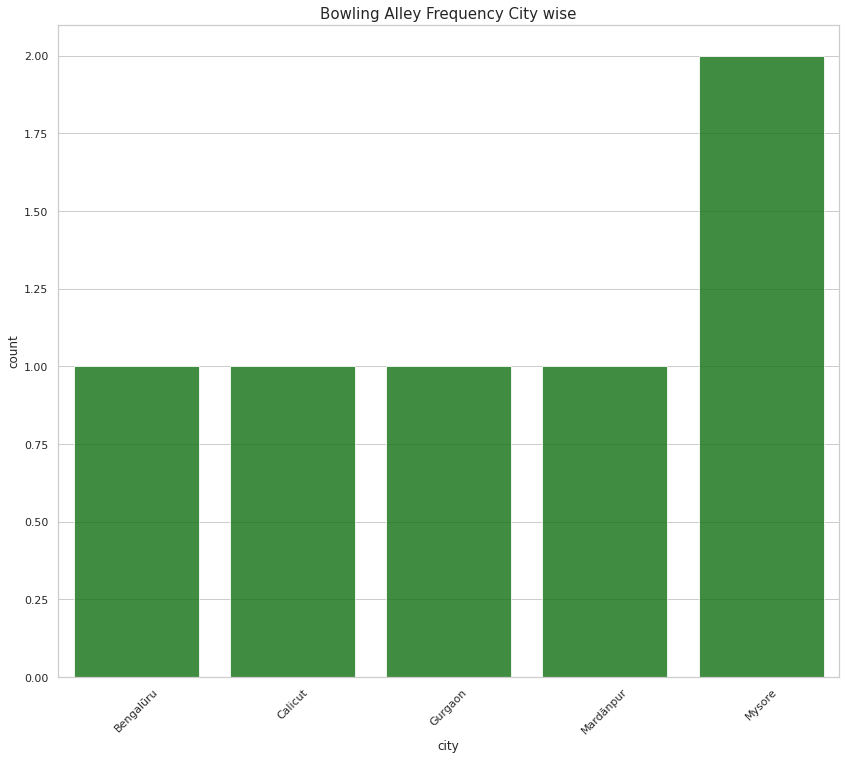

In [113]:
plt.figure(figsize=(14,12))
g = sns.countplot('city', data=b_a, color='green',alpha=.8)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Bowling Alley Frequency City wise',size=15)

In [111]:
#Exploring Gym Business Oppertunity

gym=city_venues[city_venues['Venue Category']=='Gym'].reset_index()
gym.rename(columns={'City':'city'}, inplace = True)
gym= gym.merge(df, on='city',how='inner',sort=True)
gym

,index,city,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,lat,lng,state,population
0,450,Bengalūru,12.977063,77.587106,Affinity Gym,13.009358,77.579678,Gym,12.977063,77.587106,Karnātaka,6787000.0
1,337,Chennai,13.084622,80.248357,99°F Fitness Studio,13.084923,80.211343,Gym,13.084622,80.248357,Tamil Nādu,7163000.0
2,2037,Ghāziābād,28.665353,77.439148,Gold's Gym,28.634150,77.360391,Gym,28.665353,77.439148,Uttar Pradesh,1341000.0
3,4167,Gurgaon,28.460105,77.026352,Celebrity Fitness,28.479771,77.088586,Gym,28.460105,77.026352,Haryāna,197340.0
4,1321,Indore,22.717736,75.858590,YFC (GYM & FITNESS CENTER),22.723583,75.901396,Gym,22.717736,75.858590,Madhya Pradesh,2026000.0
5,1323,Indore,22.717736,75.858590,Ray Gym,22.755386,75.888235,Gym,22.717736,75.858590,Madhya Pradesh,2026000.0
6,3052,Mangalore,12.865371,74.842432,Zuese Fitness,12.877426,74.842354,Gym,12.865371,74.842432,Karnātaka,776632.0
7,830,Pune,18.513271,73.849852,The Lunges Health Club.,18.519542,73.831186,Gym,18.513271,73.849852,Mahārāshtra,4672000.0
8,855,Pune,18.513271,73.849852,Golds Gym Kothrud,18.499119,73.821560,Gym,18.513271,73.849852,Mahārāshtra,4672000.0
9,885,Pune,18.513271,73.849852,Gold's Gym,18.553561,73.807564,Gym,18.513271,73.849852,Mahārāshtra,4672000.0


Text(0.5, 1.0, 'Gym frequency City wise')

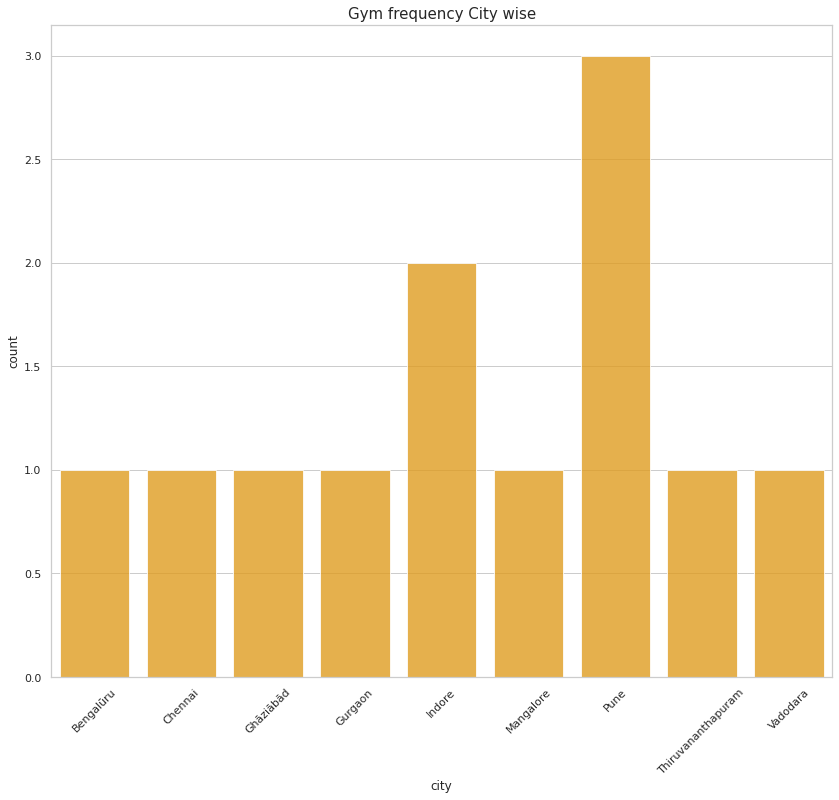

In [112]:
plt.figure(figsize=(14,12))
g = sns.countplot('city', data=gym, color='orange',alpha=.8)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Gym frequency City wise',size=15)

Now we will Cluster the cities based on the venues 

In [129]:
# Preprocessing City-Venues Data
# one hot encoding
city_venues_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_venues_onehot['City'] = city_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [city_venues_onehot.columns[-1]] + list(city_venues_onehot.columns[:-1])
city_venues_onehot = city_venues_onehot[fixed_columns]

city_venues_onehot.head()
# group it by city
city_grouped = city_venues_onehot.groupby('City').mean().reset_index()

city_grouped


,City,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vineyard,Volleyball Court,Watch Shop,Women's Store
0,Abohar,0.0,0.8,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,Agartala,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.400000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,Ahmadnagar,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.142857,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,Ahmadābād,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,...,0.000000,0.0,0.0,0.0,0.04,0.01,0.0,0.0,0.0,0.0
4,Aizawl,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Vālpārai,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
207,Vārānasi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
208,Warangal,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.052632,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
209,Āgra,0.0,0.0,0.0,0.0,0.016393,0.0,0.0,0.0,0.00,...,0.016393,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [130]:

#We will deine a function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [132]:
# create a new city dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], 10)

city_venues_sorted.head(10)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abohar,ATM,Pizza Place,Financial or Legal Service,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Women's Store
1,Agartala,Train Station,Multiplex,Men's Store,Coffee Shop,Financial or Legal Service,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
2,Ahmadnagar,Indian Restaurant,Italian Restaurant,Multiplex,Pizza Place,Train Station,Shopping Mall,Women's Store,Field,Fabric Shop,Factory
3,Ahmadābād,Café,Indian Restaurant,Hotel,Dessert Shop,Restaurant,Coffee Shop,Fast Food Restaurant,Multiplex,Sandwich Place,Vegetarian / Vegan Restaurant
4,Aizawl,Clothing Store,Park,Shopping Mall,Restaurant,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Women's Store
5,Ajmer,Indian Restaurant,Hotel,Pizza Place,Vegetarian / Vegan Restaurant,Café,Lake,Bakery,Restaurant,Coffee Shop,Market
6,Akola,Café,Mobile Phone Shop,Indian Restaurant,Ice Cream Shop,Asian Restaurant,Dessert Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant
7,Alappuzha,Indian Restaurant,Resort,Fast Food Restaurant,Café,Lake,Asian Restaurant,Boat or Ferry,Museum,Scenic Lookout,Cafeteria
8,Allahābād,Train Station,Pizza Place,Fast Food Restaurant,Flea Market,River,Restaurant,Clothing Store,Shopping Mall,Coffee Shop,Multiplex
9,Alwar,Platform,Pizza Place,Hotel,Skate Park,Asian Restaurant,Clothing Store,Shopping Mall,Women's Store,Field,Factory


In [137]:
### Clustering into 5 Groups based on Venues
from sklearn.cluster import KMeans

kclusters = 5
city_grouped_clustering = city_grouped.drop('City', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



ValueError: cannot insert Cluster Labels, already exists

In [142]:
city_venues_sorted.rename(columns={'City':'city'}, inplace = True)
city_venues_sorted.head(10)
city_merged = city_venues_sorted.merge(df, on='city',how='right',sort=True)
city_merged

,Cluster Labels,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,lat,lng,state,population
0,4,Abohar,ATM,Pizza Place,Financial or Legal Service,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Women's Store,30.144533,74.195520,Punjab,130603.0
1,0,Agartala,Train Station,Multiplex,Men's Store,Coffee Shop,Financial or Legal Service,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,23.836049,91.279386,Tripura,203264.0
2,3,Ahmadnagar,Indian Restaurant,Italian Restaurant,Multiplex,Pizza Place,Train Station,Shopping Mall,Women's Store,Field,Fabric Shop,Factory,19.094571,74.738432,Mahārāshtra,391760.0
3,2,Ahmadābād,Café,Indian Restaurant,Hotel,Dessert Shop,Restaurant,Coffee Shop,Fast Food Restaurant,Multiplex,Sandwich Place,Vegetarian / Vegan Restaurant,23.025793,72.587265,Gujarāt,5375000.0
4,2,Aizawl,Clothing Store,Park,Shopping Mall,Restaurant,Event Space,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Women's Store,23.736701,92.714596,Mizoram,283021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2,Vālpārai,South Indian Restaurant,Jewelry Store,Lake,Resort,Clothing Store,Trail,Rock Climbing Spot,Dessert Shop,Dhaba,Food,10.325163,76.955299,Tamil Nādu,114308.0
208,1,Vārānasi,Hotel,Indian Restaurant,Café,Pizza Place,Hostel,Shopping Mall,History Museum,Historic Site,Temple,Dessert Shop,25.317740,83.005811,Uttar Pradesh,1352000.0
209,2,Warangal,Historic Site,Hotel,Multiplex,Indian Restaurant,Pizza Place,Department Store,Clothing Store,Sake Bar,Fast Food Restaurant,Shopping Mall,17.978423,79.600209,Andhra Pradesh,1203853.0
210,1,Āgra,Hotel,Indian Restaurant,Historic Site,Resort,Multicuisine Indian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Pizza Place,Market,27.187935,78.003944,Uttar Pradesh,1592000.0


In [143]:
city_cluster = city_merged.groupby('Cluster Labels').count()
city_cluster

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,lat,lng,state,population
Cluster Labels,,,,,,,,,,,,,,,
0,27,27,27,27,27,27,27,27,27,27,27,27,27,27,26
1,36,36,36,36,36,36,36,36,36,36,36,36,36,36,35
2,118,118,118,118,118,118,118,118,118,118,118,118,118,118,115
3,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
4,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [150]:
#Cluster 0

cluster_0 = city_merged[city_merged['Cluster Labels']==0].reset_index()
cluster_0 = cluster_0[['city','state','population']].sort_values(by='population',ascending=False)
cluster_0.head(27)

,city,state,population
26,Āsansol,West Bengal,1328000.0
7,Dhanbād,Jharkhand,1246000.0
3,Bareilly,Uttar Pradesh,817000.0
1,Amrāvati,Mahārāshtra,734451.0
25,Ujjain,Madhya Pradesh,513350.0
21,Sahāranpur,Uttar Pradesh,484873.0
9,Gulbarga,Karnātaka,483615.0
4,Bhātpāra,West Bengal,483129.0
24,Sīkar,Rājasthān,400000.0
15,Lātūr,Mahārāshtra,374394.0


Text(0.5, 1.0, 'Population Vs City for CLUSTER 0')

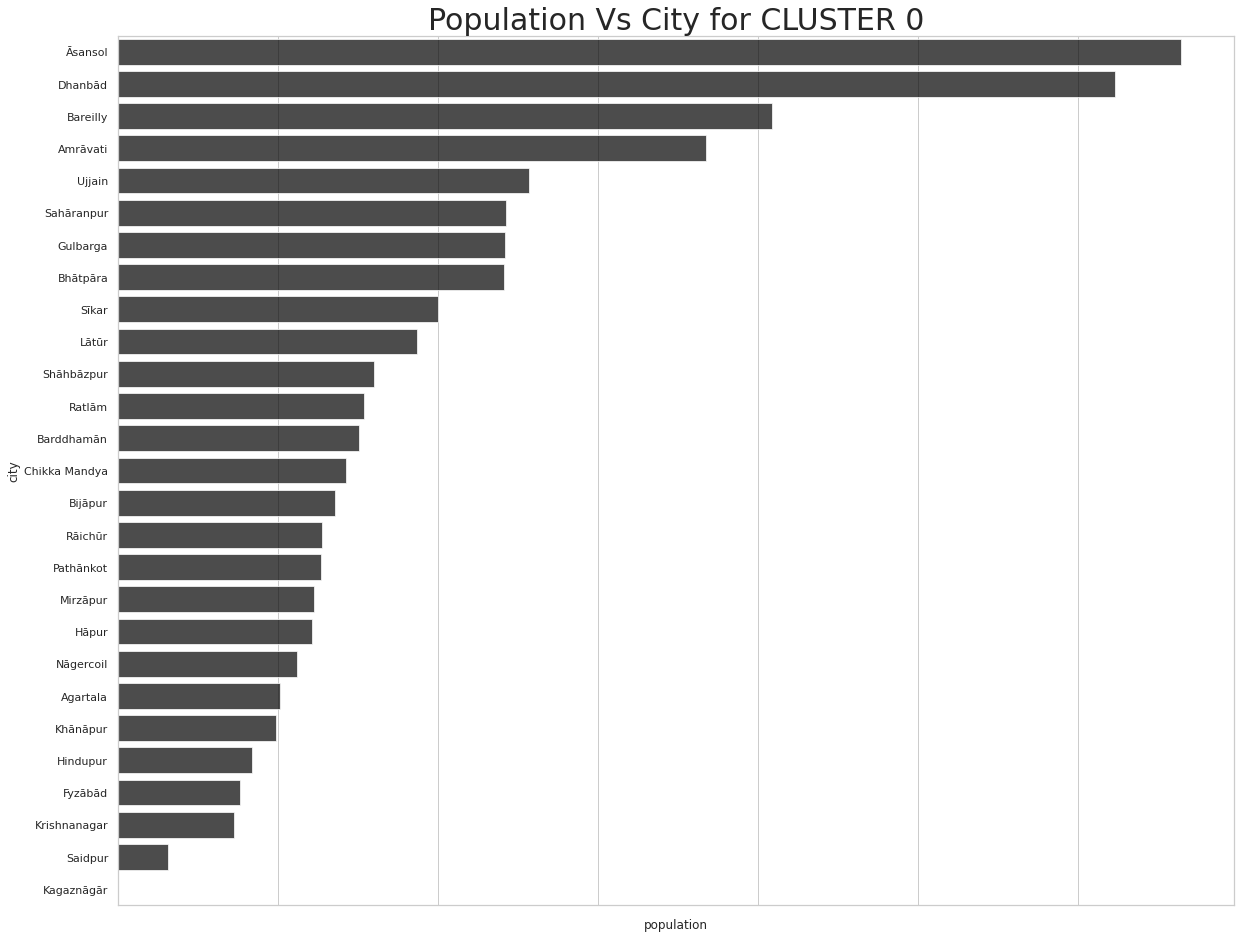

In [159]:
plt.figure(figsize=(20,16))
sns.set(font_scale=10)
sns.set(style="whitegrid")
ax = sns.barplot(x="population", y="city", data=cluster_0,color="black", alpha=.7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=20)
ax.set_title("Population Vs City for CLUSTER 0",size=30)

In [160]:
#Cluster 1

cluster_1 = city_merged[city_merged['Cluster Labels']==1].reset_index()
cluster_1 = cluster_1[['city','state','population']].sort_values(by='population',ascending=False)
cluster_1.head(27)

,city,state,population
6,Delhi,Delhi,15926000.0
26,Rāmpura,Rājasthān,2917000.0
35,Āgra,Uttar Pradesh,1592000.0
34,Vārānasi,Uttar Pradesh,1352000.0
12,Jamshedpur,Jharkhand,1300000.0
14,Jodhpur,Rājasthān,995000.0
10,Hubli,Karnātaka,890000.0
13,Jhānsi,Uttar Pradesh,826494.0
19,Morādābād,Uttar Pradesh,787000.0
28,Shimoga,Karnātaka,654055.0


Text(0.5, 1.0, 'Population Vs City for CLUSTER 1')

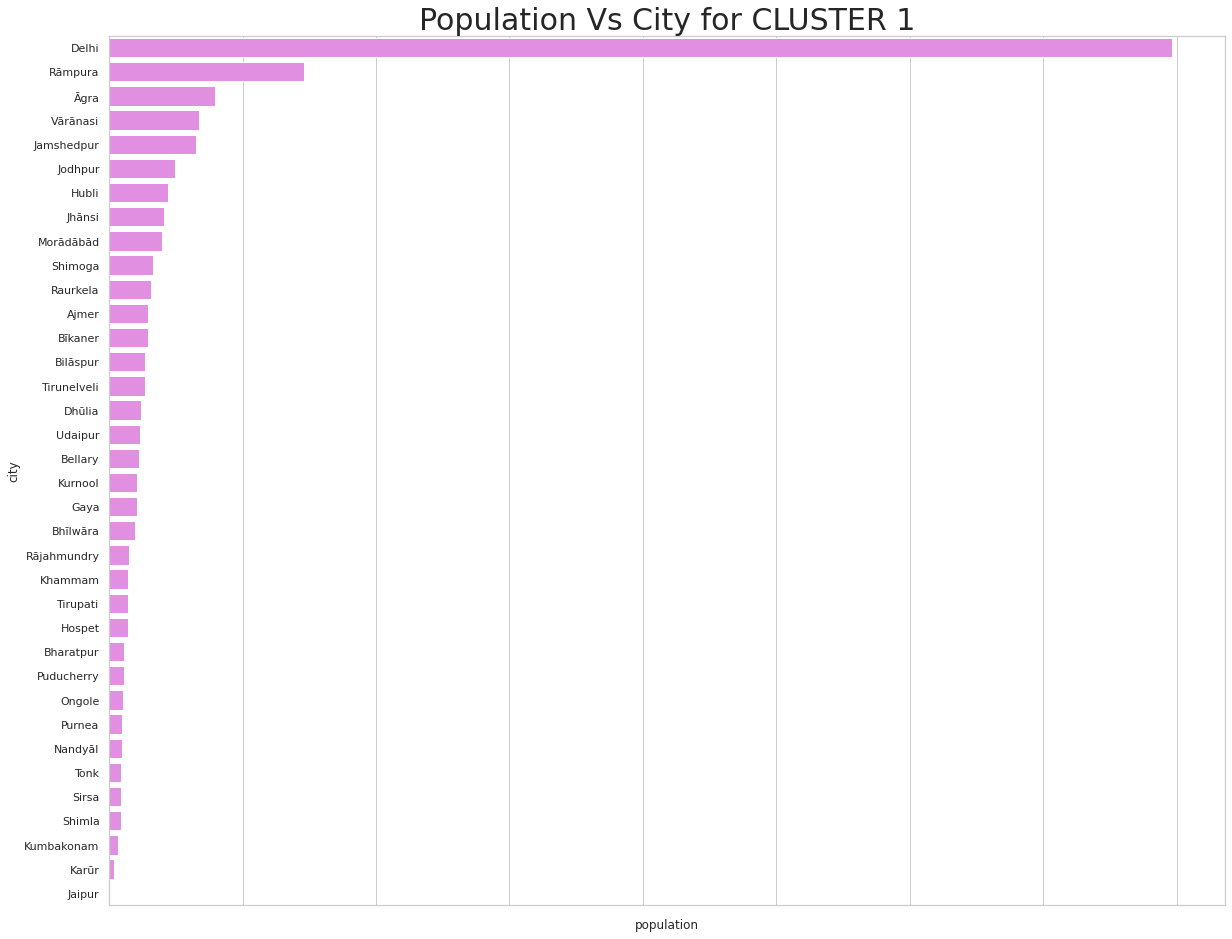

In [176]:
plt.figure(figsize=(20,16))
sns.set(font_scale=10)
sns.set(style="whitegrid")
ax = sns.barplot(x="population", y="city", data=cluster_1,color="violet", alpha=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=20)
ax.set_title("Population Vs City for CLUSTER 1",size=30)

In [168]:
#Cluster 2

cluster_2 = city_merged[city_merged['Cluster Labels']==2].reset_index()
cluster_2 = cluster_2[['city','state','population']].sort_values(by='population',ascending=False)
cluster_2_20 = cluster_2.head(20)
cluster_2_20

,city,state,population
74,Mumbai,Mahārāshtra,18978000.0
63,Kolkata,West Bengal,14787000.0
25,Chennai,Tamil Nādu,7163000.0
12,Bengalūru,Karnātaka,6787000.0
49,Hyderabad,Andhra Pradesh,6376000.0
0,Ahmadābād,Gujarāt,5375000.0
50,Hāora,West Bengal,4841638.0
90,Pune,Mahārāshtra,4672000.0
106,Sūrat,Gujarāt,3842000.0
71,Mardānpur,Uttar Pradesh,3162000.0


Text(0.5, 1.0, 'Population Vs City for CLUSTER 2')

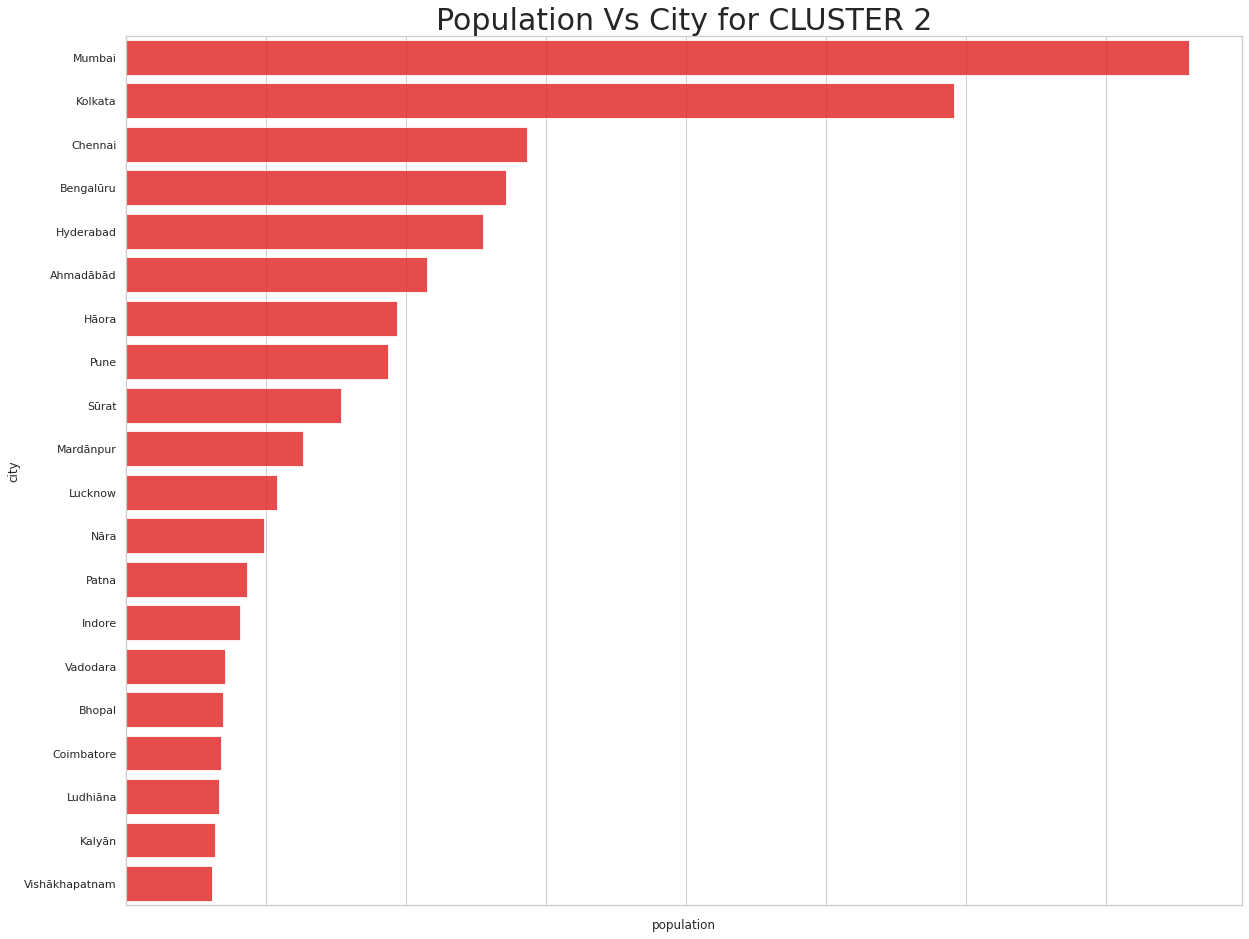

In [169]:
plt.figure(figsize=(20,16))
sns.set(font_scale=10)
sns.set(style="whitegrid")
ax = sns.barplot(x="population", y="city", data=cluster_2_20,color="red", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=20)
ax.set_title("Population Vs City for CLUSTER 2",size=30)

In [171]:
#Cluster 3

cluster_3 = city_merged[city_merged['Cluster Labels']==3].reset_index()
cluster_3 = cluster_3[['city','state','population']].sort_values(by='population',ascending=False)
cluster_3

,city,state,population
6,Madurai,Tamil Nādu,1294000.0
12,Solāpur,Mahārāshtra,1057000.0
11,Salem,Tamil Nādu,873000.0
14,Tumkūr,Karnātaka,399606.0
0,Ahmadnagar,Mahārāshtra,391760.0
8,Parbhani,Mahārāshtra,378326.0
7,Muzaffarnagar,Uttar Pradesh,349706.0
10,Rohtak,Haryāna,317245.0
1,Bamanpurī,Uttar Pradesh,296418.0
13,Sonīpat,Haryāna,250521.0


Text(0.5, 1.0, 'Population Vs City for CLUSTER 3')

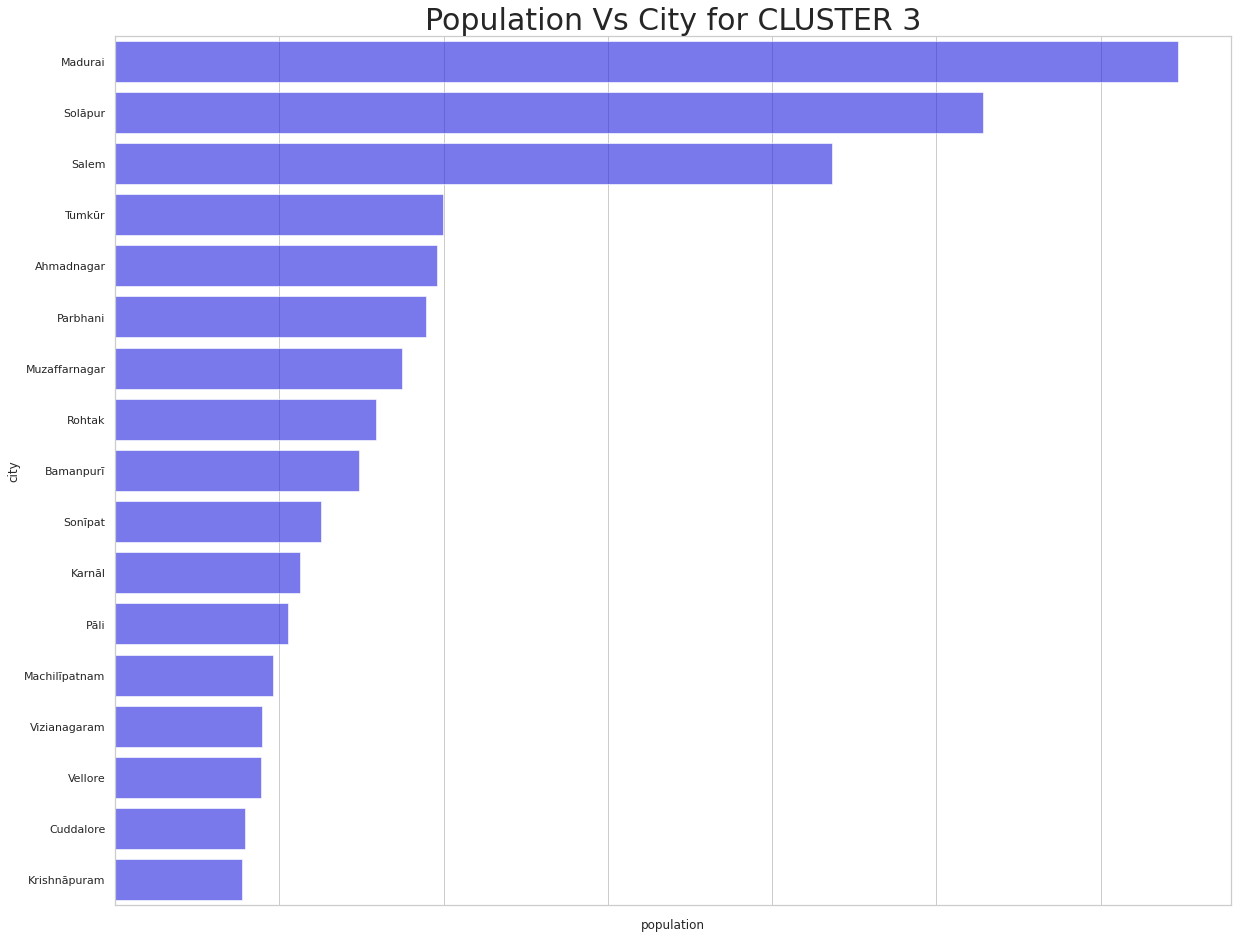

In [174]:
plt.figure(figsize=(20,16))
sns.set(font_scale=20)
sns.set(style="whitegrid")
ax = sns.barplot(x="population", y="city", data=cluster_3,color="blue", alpha=.6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=20)
ax.set_title("Population Vs City for CLUSTER 3",size=30)

In [177]:
#Cluster 4

cluster_4 = city_merged[city_merged['Cluster Labels']==4].reset_index()
cluster_4 = cluster_4[['city','state','population']].sort_values(by='population',ascending=False)
cluster_4

,city,state,population
8,Chānda,Mahārāshtra,595118.0
11,Nizāmābād,Andhra Pradesh,388505.0
5,Bhāgalpur,Bihār,361548.0
10,Muzaffarpur,Bihār,333200.0
6,Brahmapur,Odisha,324726.0
12,Samlaipādar,Odisha,310852.0
7,Bīdar,Karnātaka,300136.0
13,Tharati Etawah,Uttar Pradesh,257448.0
4,Bhiwāni,Haryāna,190855.0
3,Bharauri,Uttar Pradesh,182218.0


In [ ]:
plt.figure(figsize=(20,16))
sns.set(font_scale=20)
sns.set(style="whitegrid")
ax = sns.barplot(x="population", y="city", data=cluster_4,color="brown", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=20)
ax.set_title("Population Vs City for CLUSTER 4",size=30)